## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.
(Survived 와 관련 있는)
- Hint : Fare? Sibsp? Parch?

### 가설 l. 챙겨야 하는 자식이 많은경우, 자식을 챙기느라 정작 본인의 생존률이 낮을 것이다.
- **Parch**
  -  -> 생존여부를 확인해보면, 자식이 많을수록 생존률이 낮은것처럼 보인다.
  -  -> But 생존률과 표본수를 확인해 봤을때, 자식이 많을수록 생존률이 떨어지는 경향은 있으나, 자식이 많은 경우의 수가 너무 적어 그렇다 라고 보기에는 애매한 것 같다.    

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
titanic_df = pd.read_csv("./train.csv")

In [7]:
titanic_df.groupby(['Survived', 'Parch'])['Survived'].count()

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Survived, dtype: int64

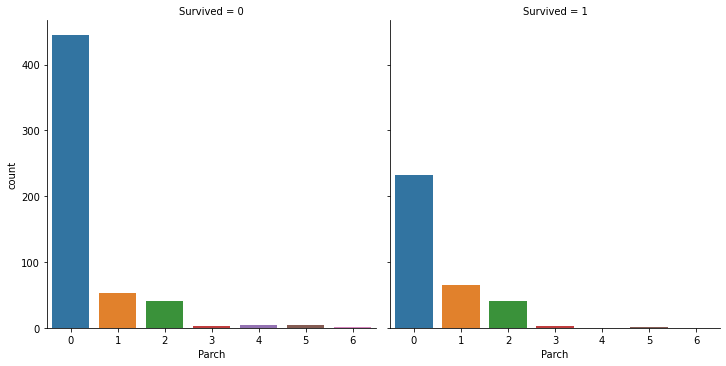

In [52]:
sns.catplot(x='Parch', col='Survived', kind = 'count', data = titanic_df)

plt.show()

In [9]:
titanic_df[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Text(0.5, 1.0, 'Relation between Survived & Parch')

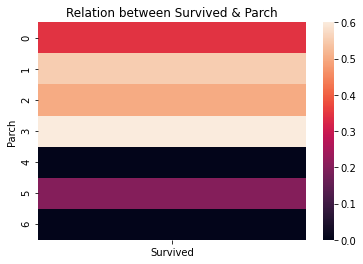

In [26]:
sns.heatmap(titanic_df[['Parch', 'Survived']].groupby(['Parch']).mean())
plt.title("Relation between Survived & Parch")   

### 가설 ll. 챙겨야 하는 가족(형제, 자매)이 많은 경우일수록 생존률이 낮을 것이다.
- **SibSp**
- -> 가족이 없는 경우를 제외하고 봤을때
    - 확실히 챙겨야할 가족이 많을수록 생존률이 낮아지는 것을 확인할 수 있다. 

In [11]:
titanic_df.groupby(['Survived', 'SibSp'])['Survived'].count()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64

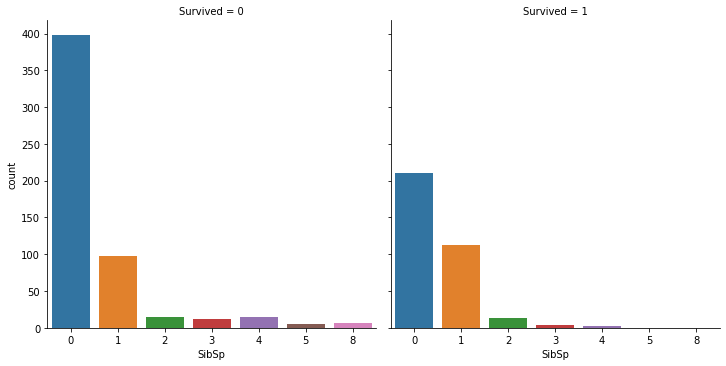

In [12]:
sns.catplot(x='SibSp',  col='Survived', kind = 'count', data = titanic_df)

plt.show()

In [13]:
titanic_df[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Text(0.5, 1.0, 'Relation between Survived & SibSp')

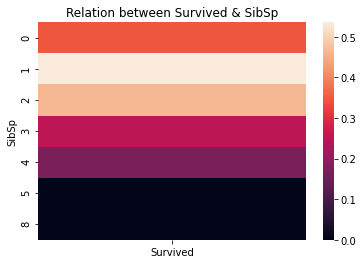

In [53]:
sns.heatmap(titanic_df[['Survived', 'SibSp']].groupby(['SibSp']).mean())
plt.title("Relation between Survived & SibSp")   

### 가설 lll. Pclass가 높을수록 Fare를 많이 냈을 것이다. 또한 돈을 많이 낸 사람일수록 생존률이 높을 것이다.
- **Fare**
    - Pclass가 높은 사람일수록 더 높은 Fare를 지불했다.
    - Pclass가 높을수록 생존률이 높아졌다.
    - -> Fare가 높을수록 생존률이 높다는 것을 확인할 수 있다.

In [15]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


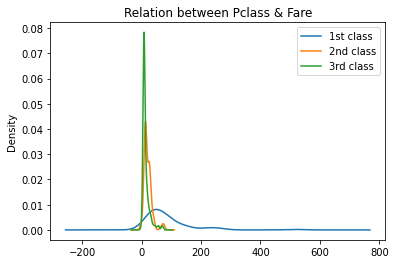

In [56]:
# Pclass가 높으면 Fare가 높을 것이다.
titanic_df['Fare'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 3].plot(kind='kde')

plt.title("Relation between Pclass & Fare")   

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

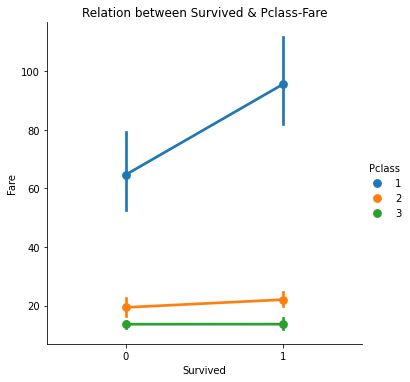

In [54]:
# Pclass와 Fare가 높은 경우 생존률이 더 높았다.
sns.catplot(x='Survived', y='Fare', hue='Pclass', kind='point', data=titanic_df)
plt.title("Relation between Survived & Pclass-Fare")   

plt.show()